# Get Dataset

In [1]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip

--2023-04-21 06:34:27--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.40.70
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.40.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 895569552 (854M) [binary/octet-stream]
Saving to: ‘datasetb2d9982.zip’

datasetb2d9982.zip  100%[===================>] 854.08M  12.2MB/s    in 71s     

2023-04-21 06:35:39 (12.0 MB/s) - ‘datasetb2d9982.zip’ saved [895569552/895569552]



In [2]:
!unzip datasetb2d9982.zip

Archive:  datasetb2d9982.zip
   creating: dataset/
  inflating: dataset/sample_submission.csv  
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        


# Imports

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
sample = pd.read_csv("dataset/sample_submission.csv")

# Analysis

## Basic Info

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734736 entries, 0 to 734735
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PRODUCT_ID       734736 non-null  int64 
 1   TITLE            734731 non-null  object
 2   BULLET_POINTS    458814 non-null  object
 3   DESCRIPTION      354735 non-null  object
 4   PRODUCT_TYPE_ID  734736 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 28.0+ MB


In [5]:
train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


## NULL Checks

In [6]:
train.isna().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [7]:
test.isna().sum()

PRODUCT_ID              0
TITLE                   5
BULLET_POINTS      275922
DESCRIPTION        380001
PRODUCT_TYPE_ID         0
dtype: int64

In [8]:
ltrain = len(train)
train.isna().sum()/ltrain

PRODUCT_ID         0.000000
TITLE              0.000005
BULLET_POINTS      0.372212
DESCRIPTION        0.514461
PRODUCT_TYPE_ID    0.000000
PRODUCT_LENGTH     0.000000
dtype: float64

In [9]:
ltest = len(test)
test.isna().sum()/ltest

PRODUCT_ID         0.000000
TITLE              0.000007
BULLET_POINTS      0.375539
DESCRIPTION        0.517194
PRODUCT_TYPE_ID    0.000000
dtype: float64

In [10]:
rtrain = len(train[train["DESCRIPTION"].isna() & train["BULLET_POINTS"].isna()])
print(rtrain, rtrain/ltrain)

rtest = len(test[test["DESCRIPTION"].isna() & test["BULLET_POINTS"].isna()])
print(rtest, rtest/ltest)

783507 0.3482720791857396
258190 0.3514051305502929


In [11]:
rtrain2 = len(train[train["DESCRIPTION"].isna() & train["BULLET_POINTS"].isna() & train["TITLE"].isna()])
print(rtrain2, rtrain2/ltrain)

rtest2 = len(test[test["DESCRIPTION"].isna() & test["BULLET_POINTS"].isna() & test["TITLE"].isna()])
print(rtest2, rtest2/ltest)

10 4.445041067734425e-06
3 4.083099235643823e-06


## Distribution

In [16]:
train.describe()["PRODUCT_LENGTH"]

count    2.249698e+06
mean     4.071839e+03
std      1.351685e+06
min      1.000000e+00
25%      5.118110e+02
50%      6.630000e+02
75%      1.062992e+03
max      1.885801e+09
Name: PRODUCT_LENGTH, dtype: float64

[Text(0.5, 0, 'log10(PRODUCT_LENGTH)'), Text(0, 0.5, 'count')]

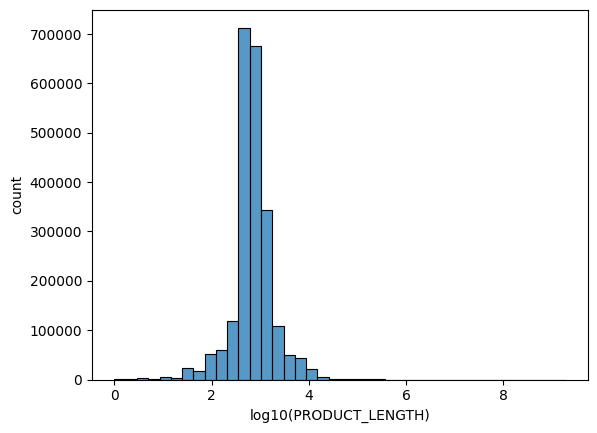

In [51]:
ax = sns.histplot(np.log10(train["PRODUCT_LENGTH"]), bins = 40, stat="count")
ax.set(xlabel = "log10(PRODUCT_LENGTH)", ylabel="count")

## Product Type

In [29]:
trainpid = set(train["PRODUCT_TYPE_ID"])
testpid = set(train["PRODUCT_TYPE_ID"])

print(len(trainpid), len(testpid), len(trainpid.intersection(testpid)))

12907 12907 12907


In [33]:
pid_summary = []
for pid in trainpid : 
  s = train[train["PRODUCT_TYPE_ID"] == pid].describe()["PRODUCT_LENGTH"]
  r = s.to_dict()
  r["PRODUCT_TYPE_ID"] = pid
  pid_summary.append(r)

pid_summary = pd.DataFrame(pid_summary)
pid_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12907 entries, 0 to 12906
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   count            12907 non-null  float64
 1   mean             12907 non-null  float64
 2   std              11015 non-null  float64
 3   min              12907 non-null  float64
 4   25%              12907 non-null  float64
 5   50%              12907 non-null  float64
 6   75%              12907 non-null  float64
 7   max              12907 non-null  float64
 8   PRODUCT_TYPE_ID  12907 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 907.6 KB


In [35]:
pid_summary[pid_summary["std"].isna()]["count"].unique()

array([1.])

[Text(0.5, 0, 'std'), Text(0, 0.5, 'count')]

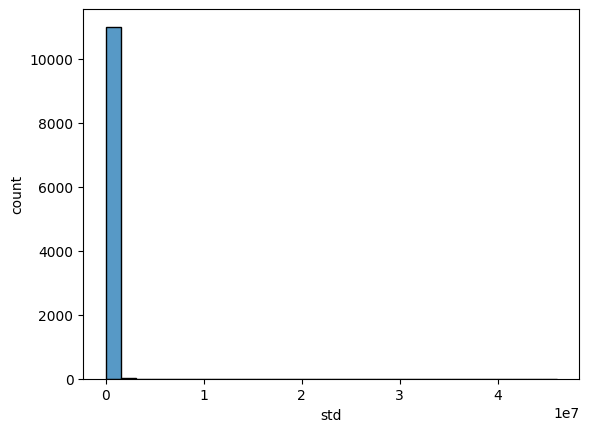

In [41]:
ax = sns.histplot(pid_summary[pid_summary["std"].isna() == False]["std"], bins = 30, stat="count")
ax.set(xlabel = "std", ylabel="count")

[Text(0.5, 0, 'log10(std)'), Text(0, 0.5, 'count')]

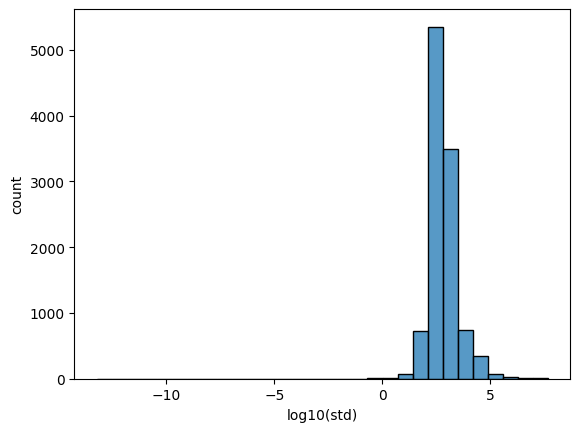

In [50]:
ax = sns.histplot(np.log10(pid_summary[~(pid_summary["std"].isna()) & pid_summary["std"]!=0]["std"]), bins = 30, stat="count")
ax.set(xlabel = "log10(std)", ylabel="count")

### Drilldown on Product Type

In [54]:
pid_summary[pid_summary["std"] > 10e5].head(10)

,count,mean,std,min,25%,50%,75%,max,PRODUCT_TYPE_ID
227,2752.0,29434.505829,1.500960e+06,1.000000,260.000000,500.000000,841.379921,78740200.0,228
601,712.0,56357.915859,1.475417e+06,3.937000,647.500000,1181.102361,1348.500000,39370100.0,604
1277,145.0,598281.559789,7.192841e+06,38.000000,590.551180,944.881889,1338.580000,86614220.0,1295
1281,224.0,283953.681172,4.233345e+06,40.000000,644.704724,1145.866141,1400.000000,63360000.0,1299
1374,397.0,567628.342268,1.128876e+07,39.370079,866.141731,1102.360000,1299.212597,224928000.0,1393
3008,169.0,214683.677345,1.378404e+06,100.000000,400.000000,590.551180,1062.992125,9515100.0,3067
3009,191.0,430419.843303,1.937892e+06,3.937000,590.551180,590.551180,793.700787,9545200.0,3068
3010,660.0,629968.667156,2.168572e+06,39.000000,500.000000,750.000000,950.000000,9961600.0,3069
3012,506.0,458321.659018,1.890238e+06,3.937000,500.000000,800.000000,1300.000000,10084200.0,3071
3014,2104.0,170673.235073,1.189060e+06,3.937000,500.000000,800.000000,1299.212597,9836700.0,3073


In [52]:
abpid = list(pid_summary[pid_summary["std"] > 10e5]["PRODUCT_TYPE_ID"])[0]
trai

,count,mean,std,min,25%,50%,75%,max,PRODUCT_TYPE_ID
227,2752.0,2.943451e+04,1.500960e+06,1.000000,260.000000,500.000000,841.379921,7.874020e+07,228
601,712.0,5.635792e+04,1.475417e+06,3.937000,647.500000,1181.102361,1348.500000,3.937010e+07,604
1277,145.0,5.982816e+05,7.192841e+06,38.000000,590.551180,944.881889,1338.580000,8.661422e+07,1295
1281,224.0,2.839537e+05,4.233345e+06,40.000000,644.704724,1145.866141,1400.000000,6.336000e+07,1299
1374,397.0,5.676283e+05,1.128876e+07,39.370079,866.141731,1102.360000,1299.212597,2.249280e+08,1393
3008,169.0,2.146837e+05,1.378404e+06,100.000000,400.000000,590.551180,1062.992125,9.515100e+06,3067
3009,191.0,4.304198e+05,1.937892e+06,3.937000,590.551180,590.551180,793.700787,9.545200e+06,3068
3010,660.0,6.299687e+05,2.168572e+06,39.000000,500.000000,750.000000,950.000000,9.961600e+06,3069
3012,506.0,4.583217e+05,1.890238e+06,3.937000,500.000000,800.000000,1300.000000,1.008420e+07,3071
3014,2104.0,1.706732e+05,1.189060e+06,3.937000,500.000000,800.000000,1299.212597,9.836700e+06,3073
